***WEB SCRAPING OF REVIEWS OF APPLE VISION PRO PRODUCT***

In [ ]:


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.supplort.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv  # For saving to CSV you I'll kk ki x mom ko

# Set up WebDriver
chrome_options = Options()
# chrome_options.add_argument("--headless")  # Uncomment for headless mode
service = Service(r"C:\Users\91639\Desktop\chrome\chromedriver.exe")
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the URL min hai ll pay log mi l ni ii o ok AA hi ll ko ii m
url = "https://www.google.com/search?q=apple+vision+review"
driver.get(url)

# Try to click the "Reviews" button only once
try:
    buttons = driver.find_elements(By.CLASS_NAME, 'zYb9zd')
    review_clicked = False  kya AA p mani lo pp all mm ko i hmm u# To track whether the "Reviews" button was clicked

    for button in buttons:
        if "Reviews" in button.text and not review_clicked:  # Check if the button contains 'Reviews'
            button.click()
            review_clicked = True  # Ensure we don't click again
            break  # Exit loop after clicking
except Exception as e:
    print("Error: {}".format(e))

time.sleep(5)

# Attempt to load more reviews with dynamic scrolling and wait for content to load
load_more_attempts = 0  # Track the number of attempts
max_reviews = 1000  # Target number of reviews to extract
total_reviews_loaded = 0  # Track the number of reviews loaded

# Open a CSV file to write the reviews
with open(r"C:\Users\91639\Downloads\reviews.csv.csv", mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(['Name', 'Rating', 'Review'])

    while total_reviews_loaded < max_reviews:
        try:
            # Scroll to the bottom of the page to trigger loading more reviews
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

            # Wait for the "Load More Reviews" button to be clickable and then click it
            WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CLASS_NAME, "yjCE1c"))
            ).click()

            load_more_attempts += 1
            print(f"Attempted to load more reviews {load_more_attempts} time(s).")

            # Wait for new reviews to load
            time.sleep(5)  # Adjust this wait time as necessary

            # Check how many reviews are loaded
            new_reviews_count = len(driver.find_elements(By.CLASS_NAME, 'HDso9d'))
            if new_reviews_count > total_reviews_loaded:
                total_reviews_loaded = new_reviews_count
                print(f"Total reviews loaded so far: {total_reviews_loaded}")

            if load_more_attempts > 100:  # Safety condition to prevent infinite loop
                print("Maximum attempts reached, stopping the script.")
                break

        except Exception as e:
            print(f"Error clicking 'Load More Reviews' button at attempt {load_more_attempts}: {e}")
            break  # Stop trying if the button is no longer interactable or another error occurs

    # Locate and extract all review cards after loading is complete
    count = 0
    try:
        review_cards = driver.find_elements(By.CLASS_NAME, 'yf')  # Locate review cards

        for i, rev_card in enumerate(review_cards):
            semi_card = driver.find_elements(By.CLASS_NAME, 'Yml1ye')
            for cards in semi_card:
                reviews = cards.find_elements(By.CLASS_NAME, 'HDso9d')

                # Iterate through each review and extract data
                for card in reviews:
                    count += 1
                    try:
                        # Extract the reviewer's name
                        name = card.find_element(By.CLASS_NAME, 'q7ToWe').text
                    except:
                        name = "Name not found"

                    try:
                        # Extract the rating
                        rating = card.find_element(By.CLASS_NAME, 'yi40Hd').text
                    except:
                        rating = "Rating not found"

                    try:
                        # Extract the short review message
                        review_message = card.find_element(By.CLASS_NAME, 'YKsAwb').text
                    except:
                        review_message = "Review message not found"

                    # Print extracted data for each review card
                    print(f"Count: {count}")
                    print(f"Name: {name}")
                    print(f"Rating: {rating}")
                    print(f"Review: {review_message}")
                    print("-" * 50)

                    # Write the extracted data into the CSV file
                    writer.writerow([name, rating, review_message])

                    # Stop once 1000 reviews are extracted
                    if count >= max_reviews:
                        break

    except Exception as e:
        print("Error extracting reviews: {}".format(e))

# Close the driver after scraping
driver.quit()

Attempted to load more reviews 1 time(s).
Total reviews loaded so far: 21
Attempted to load more reviews 2 time(s).
Total reviews loaded so far: 31
Attempted to load more reviews 3 time(s).
Total reviews loaded so far: 41
Attempted to load more reviews 4 time(s).
Total reviews loaded so far: 51
Attempted to load more reviews 5 time(s).
Total reviews loaded so far: 60
Attempted to load more reviews 6 time(s).
Total reviews loaded so far: 70
Attempted to load more reviews 7 time(s).
Total reviews loaded so far: 80
Attempted to load more reviews 8 time(s).
Total reviews loaded so far: 90
Attempted to load more reviews 9 time(s).
Total reviews loaded so far: 100
Attempted to load more reviews 10 time(s).
Total reviews loaded so far: 110
Attempted to load more reviews 11 time(s).
Total reviews loaded so far: 120
Attempted to load more reviews 12 time(s).
Total reviews loaded so far: 130
Attempted to load more reviews 13 time(s).
Total reviews loaded so far: 140
Attempted to load more review

In [ ]:
!pip install textblob

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from textblob import TextBlob



In [ ]:
apple=pd.read_csv(r"/content/reviews.csv")

EDA OF THE PRODUCT

In [ ]:
apple.head()

,Name,Rating,Review
0,NaN,NaN,NaN
1,Kevin Fuller,3.0,The Apple Vision Pro is extremely innovative; ...
2,Joseph Scroggins,2.0,I have owned this device from the launch and I...
3,Tyler Haupt,5.0,Never before was there a more expensive way to...
4,Sideboard,5.0,If you like high-tech cutting-edge experiences...


In [ ]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    888 non-null    object 
 1   Rating  888 non-null    float64
 2   Review  888 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.0+ KB


In [ ]:
apple['Rating'].value_counts()

,count
Rating,
5.0,642
1.0,165
4.0,33
3.0,30
2.0,18


In [ ]:
apple.isna().sum().sum()

9

In [ ]:
apple=apple.dropna()

In [ ]:
apple.isna().sum()

,0
Name,0
Rating,0
Review,0


In [ ]:
apple['Rating']=apple['Rating'].astype(int)

In [ ]:
apple['Rating'].value_counts()

,count
Rating,
5,642
1,165
4,33
3,30
2,18


In [ ]:
apple.describe()

,Rating
count,888.000000
mean,4.091216
std,1.582604
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# VISUALISATION OF THE RATING DISTRIBUTION **COUNT**

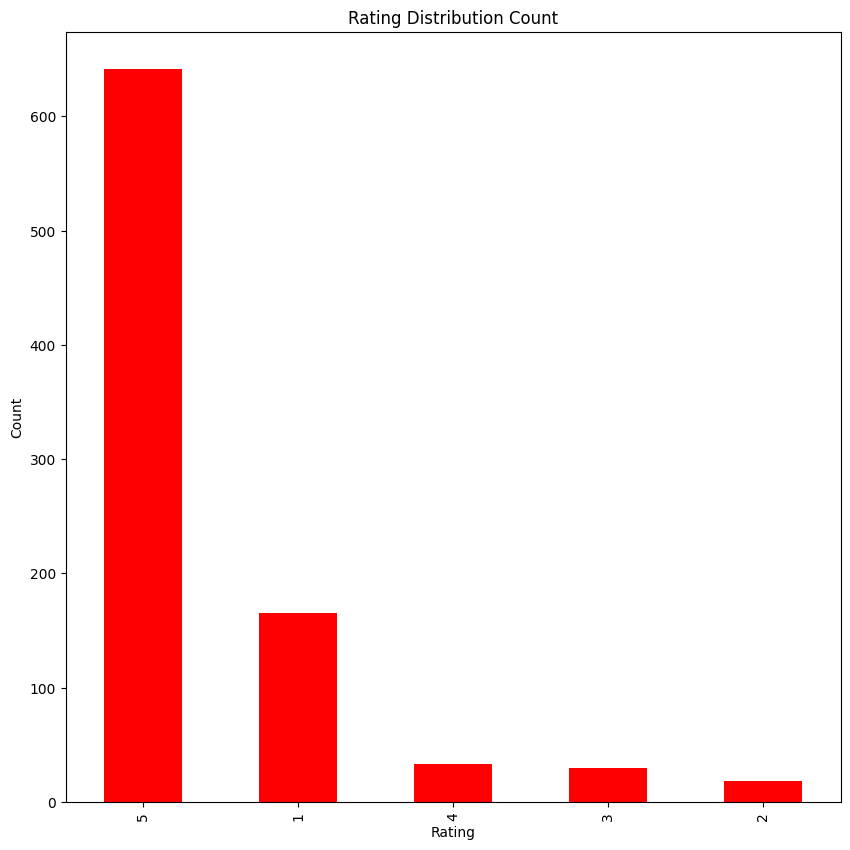

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
apple['Rating'].value_counts().plot.bar(color='red')
plt.title('Rating Distribution Count')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()


In [ ]:
apple["Rating"].value_counts(normalize=True)

,proportion
Rating,
5,0.722973
1,0.185811
4,0.037162
3,0.033784
2,0.020270


In [ ]:
apple.head()

,Name,Rating,Review
1,Kevin Fuller,3,The Apple Vision Pro is extremely innovative; ...
2,Joseph Scroggins,2,I have owned this device from the launch and I...
3,Tyler Haupt,5,Never before was there a more expensive way to...
4,Sideboard,5,If you like high-tech cutting-edge experiences...
5,James DeRose,4,Absolutely love my Vision Pro. I was in the pr...


In [ ]:
apple['Rating']=np.where((apple['Rating']<=2),0,apple.Rating)
apple['Rating']=np.where((apple['Rating']>2),1,apple.Rating)

# **DATAFRAME AFTER DIVIDING RATING CATEGORY TO POSITIVE AND NEGATIVE**

In [ ]:
apple.head()

,Name,Rating,Review
1,Kevin Fuller,1,The Apple Vision Pro is extremely innovative; ...
2,Joseph Scroggins,0,I have owned this device from the launch and I...
3,Tyler Haupt,1,Never before was there a more expensive way to...
4,Sideboard,1,If you like high-tech cutting-edge experiences...
5,James DeRose,1,Absolutely love my Vision Pro. I was in the pr...


In [ ]:
apple['Rating'].value_counts()

,count
Rating,
1,705
0,183


VISUALISATION OF POSITIVE AND NEGATIVE RATING ON THE **PRODUCT**

In [ ]:
#From here we can see we can see - '1:postive ' ratings than '0:negative' rating for apple vision pro

<Axes: ylabel='proportion'>

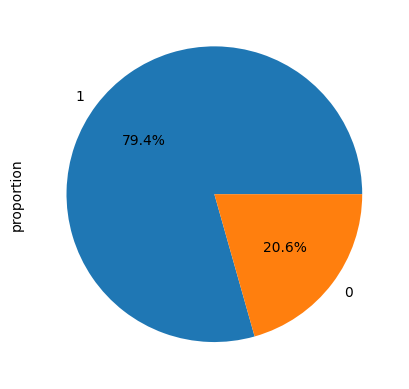

In [ ]:
apple["Rating"].value_counts(normalize=True).plot(kind="pie", autopct='%1.1f%%')

**SENTIMENT ANALYSIS OF THE REVIEW GIVEN BY THE CUSTOMER ON THE APPLE VISION PRODUCT USING TEXTBLOB**

In [ ]:
import pandas as pd
from textblob import TextBlob


if 'Review' in apple.columns:
    reviews = apple['Review']
else:
    print("Error: The 'Review' column was not found. Please check the column name.")

# Sentiment analysis function using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    # Polarity ranges from -1 (negative) to 1 (positive)
    return blob.sentiment.polarity

# Apply sentiment analysis to each review
apple['Sentiment'] = apple['Review'].apply(get_sentiment)


def sentiment_category(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

apple['Sentiment_Category'] = apple['Sentiment'].apply(sentiment_category)



DATAFRAME AFTER CATEGORISING REVIWS ON THE PRODUCT

In [ ]:
apple.head()

,Name,Rating,Review,Sentiment,Sentiment_Category
1,Kevin Fuller,1,The Apple Vision Pro is extremely innovative; ...,0.300516,Positive
2,Joseph Scroggins,0,I have owned this device from the launch and I...,0.095714,Positive
3,Tyler Haupt,1,Never before was there a more expensive way to...,0.172917,Positive
4,Sideboard,1,If you like high-tech cutting-edge experiences...,0.093750,Positive
5,James DeRose,1,Absolutely love my Vision Pro. I was in the pr...,0.282564,Positive


**APPLE VISION PRO REVIWS DATA ANALYSIS THROUGH IT'S REVIWS SUGGEST THAT 74.4% of COUSTOMER have positive reaction to the product ,9.8% have negative reaction for the product while 15.5% people have neutral opinion about the product**

<Axes: ylabel='proportion'>

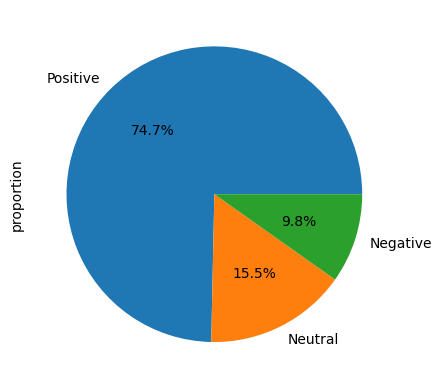

In [ ]:
apple['Sentiment_Category'].value_counts(normalize=True).plot(kind="pie", autopct='%1.1f%%')

In [ ]:
!pip install wordcloud matplotlib


In [ ]:
!pip install pandas wordcloud matplotlib


# **ANALYSIS USING WORD CLOUD**

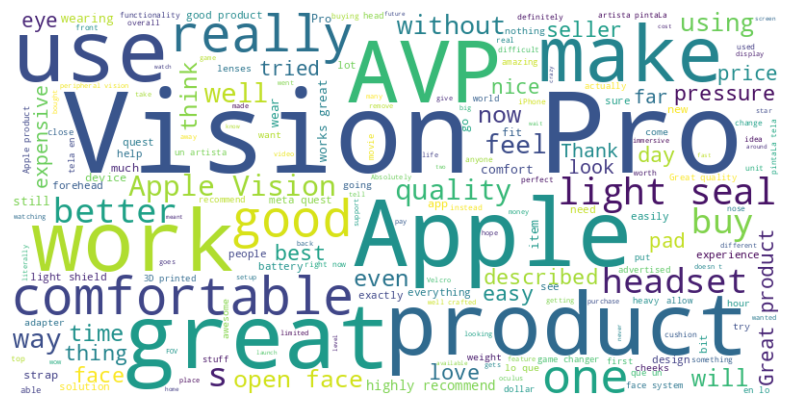

In [ ]:

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt




# Combine all reviews into a single string
text = " ".join(review for review in apple['Review'])

# Define stop words using WordCloud's built-in STOPWORDS set
stop_words = set(STOPWORDS)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


**Key** Insights:

**"Vision", "Pro", and "Apple"**: These words are very prominent, This suggests that the reviews are about apple vision pro device.

### **"Great product" and "work"**: Large number of users find the Apple Vision Pro to be a well-functioning and high-quality product.

**"Comfortable" and "light"**:  Users appreciate the comfort and lightweight nature of the device.

**"Seal", "pad", "face", "pressure"**: These terms may relate to the physical fit of the device.


**"Expensive", "price":** While positive sentiments seem to dominate, the appearance of "expensive" and "price" indicates that some users might feel the product is costly.

**"Use", "make", "buy"**:some users are telling how the product arebe useful and are suggesting its a must buy product